In [60]:
#Imports
import skimage
from skimage import io, color, data
from skimage.metrics import structural_similarity as ssim
import numpy as np
from matplotlib import pyplot as plt
import math
import cv2


(2048, 2048, 3)


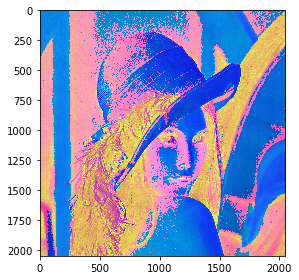

In [61]:
#Task 1. RGB to HSV function.

def RGB_TO_HSV(R : int, G : int, B : int):
    """
            The RGB_TO_HSV function transforms the values of a pixel from RGB to HSV format.
        :param R: int
            The red value.
        :param G: int
            The green value.
        :param B: int
            The blue value.
        :return: float
            Returns three floats that represent the HSV values
    """
    #Normalization of the RGB values
    R, G, B = R/255, G/255, B/255
    
    #Finding the maximal and minimal value of the RGB values and the difference between them for each pixel
    Cmax = max(R, G, B)
    Cmin = min(R, G, B)
    delt = Cmax - Cmin
    
    #Computing the Hue value
    if delt == 0 :
        H = 0
    elif Cmax == R:
        H = 60 * (( (G - B) / delt) % 6)
    elif Cmax == G:
        H = 60 * (( (B - R) / delt) + 2)
    elif Cmax == B:
        H = 60 * (( (R - G) / delt) + 4)
        
    #Computing the Value of the pixel
    V = Cmax
    
    #Computing the Saturnace
    if Cmax == 0 :
        S = 0
    else :
        S = delt / Cmax
        
    return H/360, S, V


#Reading the image
img = io.imread(r'F:\Eduard\Autodezvoltare\CV camp\CVC2\CVC_CV2_IMAGES\Lenna.png')

#Creation of a clean image with the exact dimensions as Lenna.jpg
new_image = np.zeros(img.shape, float)

#Iterating through all the pixels and changing the image using the RGB_TO_HSV function
for x in range(img.shape[0]):
    for y in range(img.shape[1]):
        new_image[x][y] = RGB_TO_HSV(img[x][y][0], img[x][y][1], img[x][y][2])
            
#Printing the converted image
io.imshow(new_image)
        

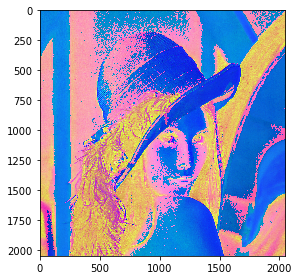

In [63]:
#Checking to see if the images look the same with the color.rgb2hsv function
test_image = color.rgb2hsv(img)
io.imshow(test_image)

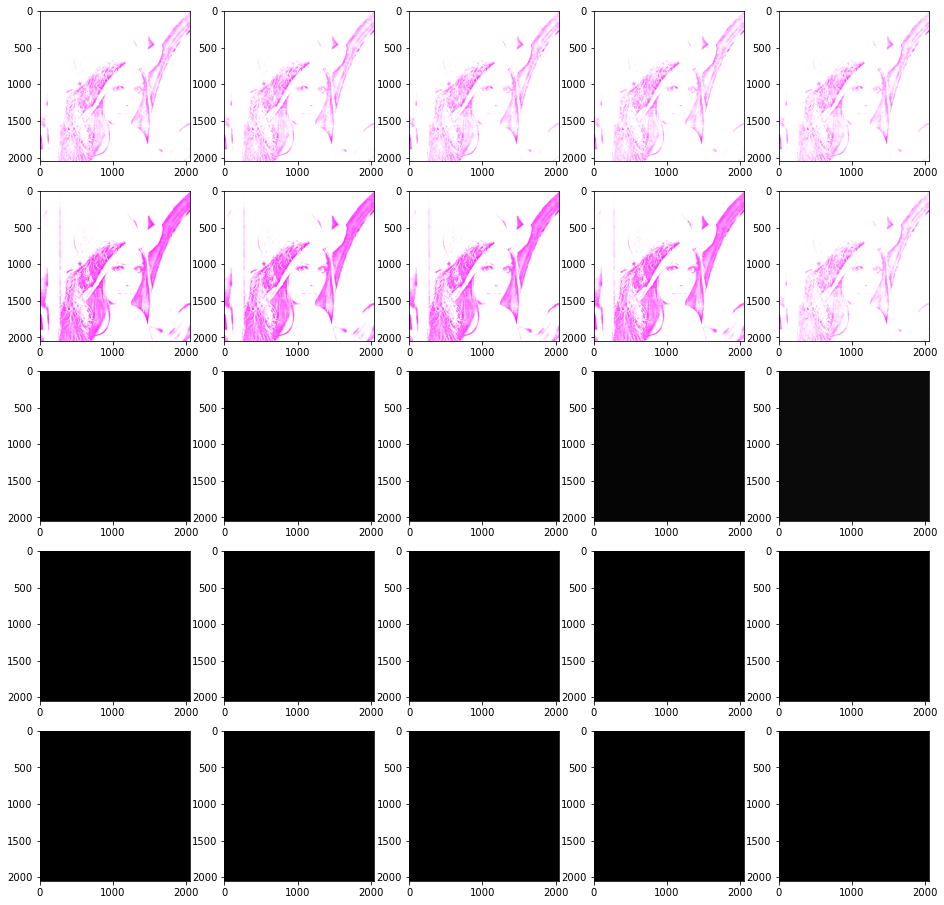

In [67]:
#Task 2. Controlling the contrast and brightness.

def change_img(img, contrast : int, brightness : int):
    """
            The change_img function changes the values of the contrast and brightness.
        :param img: numpy
            The image to be changed.
        :param contrast: int
            The contrast value to change.
        :param brightness: int
            The brightness value to change.
        :return: numpy
            Returns the modified image
    """
    #Creating a empty numpy array in the shape of the image
    new_image = np.zeros(img.shape, img.dtype)
    
    #Iterating through the image and changing the contrast and brightness values
    for y in range(img.shape[0]):
        for x in range(img.shape[1]):
            for z in range(img.shape[2]):
                new_image[y,x,z] = np.clip(contrast * img[y, x, z] + brightness, 0, 255)
                
    return new_image

#Creating a dictionary with the values from the table
dictionary = {
    1  : (-10, 10),   2 : (-5, 10),   3 : (0, 10),   4 : (5, 10),   5 : (10, 10),
    6  : (-10, 5),    7 : (-5, 5),    8 : (0, 5),    9 : (5, 5),   10 : (10, 10),
    11 : (-10, 0),   12 : (-5, 0),   13 : (0, 0),   14 : (5, 0),   15 : (10, 0),
    16 : (-10, -5),  17 : (-5, -5),  18 : (0, -5),  19 : (5, -5),  20 : (10, -5),
    21 : (-10, -10), 22 : (-5, -10), 23 : (0, -10), 24 : (5, -10), 25 : (10, -10)
}
#Creating the plot 
plt.figure(figsize = (16,16))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.imshow(change_img(img, dictionary[i+1][1], dictionary[i+1][0]))

plt.show()

In [ ]:
#Task 3. Apply Filters to blur the image and find the one that keeps the most information.

img  = io.imread(r'F:\Eduard\Autodezvoltare\CV camp\CVC2\CVC_CV2_IMAGES\Lenna.png')

#Converting the original image to gray
original_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

#Median Filtration
median_blured = cv2.medianBlur(original_gray, 3)
median_blured_img = cv2.cvtColor(median_blured, cv2.COLOR_GRAY2BGR)

#Gaussian Filtration
gaussian_blured = cv2.GaussianBlur(original_gray, (3, 3), 0)
gaussian_blured_img = cv2.cvtColor(gaussian_blured, cv2.COLOR_GRAY2BGR)

#Bilateral Filtration
bilateral_blured = cv2.bilateralFilter(original_gray, 3, 75, 75)
bilateral_blured_img = cv2.cvtColor(bilateral_blured, cv2.COLOR_GRAY2BGR)

#Setting the figure size
fig = plt.figure(num=None, figsize=(25, 25), dpi=80, facecolor='w', edgecolor='k')

#Adding the original image as a subplot
plot1 = plt.subplot(1, 4, 1, title = 'Original image')
plt.imshow(original_gray, cmap = 'gray')


#Adding the median filtrated image as a subplot
plot2 = plt.subplot(1, 4, 2, title = 'Median Filtered')
plt.imshow(median_blured_img)

#Adding the gaussian filtrated image as a subplot
plot3 = plt.subplot(1, 4, 3, title = 'Gaussian Filtered')
plt.imshow(gaussian_blured_img)

#Adding the bilateral filtrated image as a subplot
plot4 = plt.subplot(1, 4, 4, title = 'Bilateral Filteres')
plt.imshow(bilateral_blured_img)

original_gray = img

#Resizing all the images before obtaining the SSIM
median_blured_img = cv2.resize(median_blured_img, dsize = original_gray.shape[:2])

gaussian_blured_img = cv2.resize(gaussian_blured_img, dsize = original_gray.shape[:2])

bilateral_blured_img = cv2.resize(bilateral_blured_img, dsize = original_gray.shape[:2])

#Obtaining the SSIM values for the original image
ssim_original = ssim(original_gray, original_gray, data_range=original_gray.max() - original_gray.min(), multichannel=True)

#Obtaining the SSIM values for the median filtered image
ssim_median = ssim(original_gray, median_blured_img, data_range = median_blured_img.max() - median_blured_img.min(), multichannel =True)

#Obtaining the SSIM values for the gaussian filtered image
ssim_gaussian  = ssim(original_gray, gaussian_blured_img, data_range = gaussian_blured_img.max() - gaussian_blured_img.min(), multichannel =True)

#Obtaining the SSIM values for the bilateral filtered image
ssim_bilateral = ssim(original_gray, bilateral_blured_img, data_range = bilateral_blured_img.max() - bilateral_blured_img.min(), multichannel =True)

#Setting the values of the SSIM under the images
plot1.axis('off')
plot2.axis('off')
plot3.axis('off')
plot4.axis('off')
plot1.text(0.5,-0.1, ssim_original, size=20, ha="center", transform=plot1.transAxes)
plot2.text(0.5,-0.1, ssim_median, size=20, ha="center", transform=plot2.transAxes)
plot3.text(0.5,-0.1, ssim_gaussian, size=20, ha="center", transform=plot3.transAxes)
plot4.text(0.5,-0.1, ssim_bilateral, size=20, ha="center", transform=plot4.transAxes)

plt.show()